In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# zscore
from scipy.stats import zscore
# scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import *
# partitioning
from sklearn.model_selection import train_test_split
# naive bayes
from sklearn.naive_bayes import GaussianNB, CategoricalNB
# plot things
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import preprocessing

from scipy.stats import uniform, randint, loguniform

In [2]:
df = pd.read_csv("df_prepared.csv")

In [3]:
df = df.drop(columns = ["actor", "channels", "frame_width"])
df = df.drop(columns = ["Unnamed: 0"])
df.T

,0,1,2,3,4,5,6,7,8,9,...,1626,1627,1628,1629,1630,1631,1632,1633,1634,1635
intensity,0.098457,0.631358,-1.348558,0.758732,0.155406,-1.357459,-0.98013,-2.026256,-0.733545,0.245707,...,-1.305177,-0.728685,-0.743336,1.297006,0.960133,-1.126283,0.096286,-0.676684,-0.961717,-0.283181
mfcc_mean,-1.05734,-0.395268,-1.634256,-0.591085,-0.388191,-1.631794,-1.150014,-1.356778,-2.116519,-0.823284,...,-0.28937,0.517484,0.538685,1.758138,1.340825,0.019361,0.888586,-0.536015,0.117993,-0.056054
mfcc_max,-1.057499,-1.297313,-0.351829,-1.463584,0.557738,0.815532,0.325027,-1.740848,-1.164866,-0.833014,...,1.118028,1.330328,1.454646,0.094798,0.141431,-0.068684,0.78628,0.831348,0.794751,0.782607
sc_mean,0.711365,-0.387835,0.235821,-0.02753,-1.05026,1.045826,1.347705,0.355325,-0.966208,-0.248378,...,2.019462,0.607517,0.298355,-1.30103,-1.430158,-0.583105,-0.915396,1.637291,0.405295,1.042934
sc_std,-0.064439,-0.057416,1.185831,0.133143,0.805921,0.641629,1.118575,-0.731186,0.082613,0.261168,...,0.402658,-0.169445,-0.512277,-1.159617,-0.372066,0.51282,-0.295,1.423725,0.397302,1.030862
sc_min,-1.086454,-1.086454,-1.086454,-1.086454,-1.086454,-1.086454,-1.086454,-1.086454,-1.086454,-1.086454,...,0.530083,0.358332,0.651561,0.160336,0.841591,-1.086454,0.567478,-1.086454,0.411457,-1.086454
sc_max,1.703404,0.176451,0.216732,0.194198,0.231638,0.168743,0.249858,0.198487,0.177374,0.274089,...,0.147046,-1.157523,-0.070086,-1.458047,0.150421,0.360201,-0.636082,0.232993,0.150734,0.367565
sc_kur,0.038205,0.021814,-0.620262,-0.043494,0.049107,-0.801472,-0.815632,1.160545,0.774579,-0.049919,...,-0.523679,-0.658453,-0.474603,0.77202,1.850079,0.320212,-0.585773,-0.824295,-0.564072,-0.626587
sc_skew,-0.27626,0.250069,-0.707327,0.418278,0.585822,-1.306701,-1.19318,1.253786,1.385199,0.580027,...,-1.83907,-1.645892,-1.134505,1.262319,2.213627,0.446676,0.216862,-1.310056,-0.402231,-0.569138
stft_mean,-0.734194,-1.164234,-0.830805,-0.725426,-1.528791,0.138848,0.717073,0.232318,-1.549968,-0.810788,...,2.204723,1.877179,1.167588,0.151425,-0.500596,0.211668,-0.116744,1.39534,1.248063,0.958383


### To Predict
emotion - emotion positivity - sex - emotional intensity

In [22]:
to_pred = "sex"
y_rude = np.array(df[to_pred]) # <--- this is the variable prediction parameter
lab = preprocessing.LabelEncoder()
y = lab.fit_transform(y_rude)

categorical_cols = ["emotion", "sex", "emotion_positivity", "emotional_intensity", "vocal_channel", "repetition"]
df_num = pd.get_dummies(df, columns=categorical_cols)
#df_num.T

In [23]:
X = df_num.values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [24]:
#norm = StandardScaler()
#norm.fit(X_train)
#X_train_norm = norm.transform(X_train)
#X_test_norm = norm.transform(X_test)

In [25]:
clf = KNeighborsClassifier(n_neighbors=5, metric="euclidean", weights="uniform")
clf.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [26]:
clf.score(X_test, y_test)

0.9837067209775967

In [27]:
%%time

'''


best_scores=[]
for i in range(20):
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10)
    rand.fit(x, y)
    best_scores.append(round(rand.best_score_,3))
    
grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
)    
    

'''

param_grid = {
    "n_neighbors": np.arange(1, X_train.shape[0]//2),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "cityblock"],
}
grid = RandomizedSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy', n_iter=10, random_state=5)

grid.fit(X_train, y_train)
clf = grid.best_estimator_

CPU times: user 47.5 s, sys: 4.99 s, total: 52.5 s
Wall time: 6min 48s


In [28]:
print(grid.best_params_, grid.best_score_)

{'metric': 'cityblock', 'n_neighbors': 6, 'weights': 'distance'} 0.9955458515283843


In [29]:
grid

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=0),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'cityblock'],
                         'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,...
       482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494,
       495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507,
       508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520,
       521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533,
       534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546,
       547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559,
       560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571]),
                         'weights': ['uniform', 'distance']})

In [30]:
clf.score(X_test, y_test)

0.9959266802443992

In [31]:
#grid.cv_results_

In [32]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,...,split43_test_score,split44_test_score,split45_test_score,split46_test_score,split47_test_score,split48_test_score,split49_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000868,0.000815,0.014969,0.014873,euclidean,1,uniform,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei...",0.978166,0.973799,...,0.960699,0.973799,0.969432,0.969432,0.965066,0.969432,0.982533,0.972402,0.009664,990
1,0.000410,0.000310,0.004078,0.001385,euclidean,1,distance,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei...",0.978166,0.973799,...,0.960699,0.973799,0.969432,0.969432,0.965066,0.969432,0.982533,0.972402,0.009664,990
2,0.000441,0.000493,0.009778,0.003922,euclidean,2,uniform,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei...",0.965066,0.951965,...,0.969432,0.969432,0.947598,0.956332,0.969432,0.965066,0.982533,0.966463,0.009585,1131
3,0.000395,0.000521,0.004379,0.002093,euclidean,2,distance,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei...",0.978166,0.973799,...,0.960699,0.973799,0.969432,0.969432,0.965066,0.969432,0.982533,0.972402,0.009664,990
4,0.000421,0.000296,0.010308,0.003947,euclidean,3,uniform,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.991266,0.978166,...,0.986900,0.986900,0.982533,0.973799,0.986900,0.991266,1.000000,0.988472,0.006404,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279,0.000499,0.000342,0.039989,0.004400,cityblock,569,distance,"{'metric': 'cityblock', 'n_neighbors': 569, 'w...",0.969432,0.965066,...,0.973799,0.956332,0.951965,0.960699,0.978166,0.956332,0.986900,0.970917,0.013176,1038
2280,0.000448,0.000385,0.042306,0.008043,cityblock,570,uniform,"{'metric': 'cityblock', 'n_neighbors': 570, 'w...",0.943231,0.938865,...,0.951965,0.938865,0.938865,0.951965,0.960699,0.921397,0.960699,0.944978,0.016548,1903
2281,0.000521,0.000338,0.046123,0.012820,cityblock,570,distance,"{'metric': 'cityblock', 'n_neighbors': 570, 'w...",0.969432,0.965066,...,0.973799,0.956332,0.951965,0.965066,0.978166,0.956332,0.986900,0.970655,0.013332,1043
2282,0.000523,0.000345,0.048434,0.007309,cityblock,571,uniform,"{'metric': 'cityblock', 'n_neighbors': 571, 'w...",0.943231,0.938865,...,0.951965,0.938865,0.938865,0.951965,0.960699,0.921397,0.960699,0.945677,0.016037,1890


In [33]:
results["metric_weight"] = results["param_metric"] + " , " + results["param_weights"]

<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

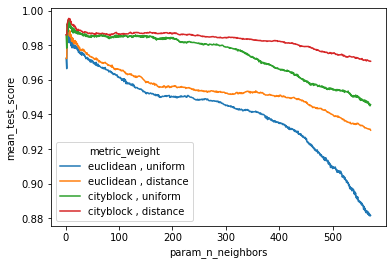

In [34]:
sns.lineplot(
    data=results, x="param_n_neighbors", y="mean_test_score", hue="metric_weight"
)

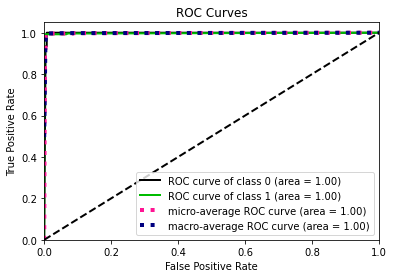

ValueError: y should be a 1d array, got an array of shape (491, 2) instead.

In [35]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_test, clf.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro"))

In [18]:
y_test_pred = grid.predict(X_test)

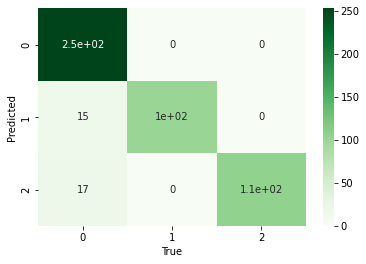

In [19]:
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

<AxesSubplot:>

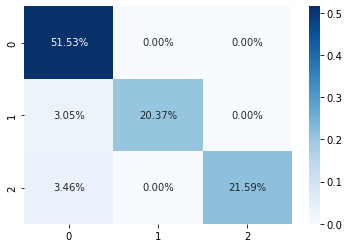

In [20]:
sns.heatmap(cf/np.sum(cf), annot=True, 
            fmt='.2%', cmap='Blues')